# Objective:

There are 3 key pieces of information that I need to know before I can build all the loci from these searches up from their peptides.  

1. Is the census output complete?  Does DTASelect have peptides that don't appear in census.  If so, (as is most likely the case) I will have to bring both in.  As an aside, this is the only place that I'll be able to get information like peptide spec counts  

2. How do the spec counts compare between DTASelect from the individual searches and the combined search? Is it as painfully simple as n14_specs + n15_specs = combined_specs?  Also, how do the peptides compare.  If there is a close match in terms of composition of peptides and number of specs, these could be useful for 'hacked' quantification on peptides where no ratio is avaliable.  

3. How does Census come up with a ratio for the overall protein locus from the individual peptides?  
    - Is it a simple average, or average of the spec non-singleton peptide ratios?
    - Is it some kind of weighted average?
        - If its weighted, how?
            - Spec Counts?
            - Inegrations?
            - Xcorr, or Sp statistics?

## Census vs DTASelect Peptides

In [1]:
import os
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

from scripts.blazmass_tools import dta_select_parser
from scripts import census_parser as cp

In [2]:
BASE_DIR = '../data/20160331-UnerFecal-Lys-N14N15-Pool/'

In [3]:
"""
    Current Keys:
       'AA_Sequence', 'CalcM+H+', 'ChargeState', 'Conf%', 'DeltCN', 'FileName',
       'IonProportion', 'LCStep', 'M+H+', 'PPM', 'Redundancy', 'Scan',
       'Sequence', 'SpR', 'SpScore', 'TotalIntensity', 'Unique', 'XCorr',
       'aa_sequence', 'charge_state', 'diff_mass', 'isModified', 'is_modified',
       'lc_step', 'mods', 'scan', 'unmod_peptide'
"""

def dtaparser_to_pd_peps(dtaparser, n15=False):
    df = pd.io.json.json_normalize(dtaparser, 'peptides')
    #Fix the file name
    df['file_name'] = df['FileName'].str.split('.', expand=True)[0]
    # Add easily accessable source metdata
    if n15:
        df['n15'] = True
    else:
        df['n15'] = df['file_name'].str.contains('n15')
    # Remove Redunant Data
    df = df.drop(['FileName', 'Scan', 'ChargeState', 'isModified', 'LCStep', 'AA_Sequence'],axis=1)
    
    # Return with normalized column names
    return df.rename(columns=str.lower)

In [4]:
"""
# Code used to determine redunant keys in DTASelect Peptides
import operator
counts = {}

idx = list(d_peps.rename(columns=str.lower).keys())
idx = list(map(lambda x: ''.join(x.split('_')), idx))

for x in idx:
    counts[x] = idx.count(x)

for y in sorted(counts.items(), key=operator.itemgetter(1), reverse = True):
    print (y)
"""

"\n# Code used to determine redunant keys in DTASelect Peptides\nimport operator\ncounts = {}\n\nidx = list(d_peps.rename(columns=str.lower).keys())\nidx = list(map(lambda x: ''.join(x.split('_')), idx))\n\nfor x in idx:\n    counts[x] = idx.count(x)\n\nfor y in sorted(counts.items(), key=operator.itemgetter(1), reverse = True):\n    print (y)\n"

In [5]:
comb_dta = os.path.join(BASE_DIR, 'rawXtractor/combined_search/DTASelect-filter_p.txt')
census = os.path.join(BASE_DIR,'rawXtractor/combined_search/census-out.txt')

dtaparser = list(dta_select_parser(comb_dta))
c_prot, c_peps = cp.parse_file(census)

d_peps = dtaparser_to_pd_peps(dtaparser)

In [6]:
c_peps.head()

,area_ratio,cs,deltacn,determinant_factor,enrichment,enrichment_mr,file_name,index,peak_int,probability_score,...,singleton_score,type,unique,xcorr,aa_sequence,n15,sam_int_corr,log_sam_int_corr,log_ref_int,log_peak_int
0,1.924659,2,0.314934,0.95443,0.95,0.218133,UnerFecal-Pool-1118-1122a-s7,8d781d0e,3014016,1.221245e-15,...,NaN,S,NaN,4.048191,CPEPCPPQVWPGPCR,False,10368008,23.305635,22.361032,21.523256
1,1.989701,3,0.321765,0.66524,0.95,0.212518,UnerFecal-Pool-1118-1122a-s11,8d781d0e,861237,4.956355e-08,...,NaN,S,NaN,3.771593,PVVCYEQCPPQPWQSTCPPVQFPPCQQK,False,3869471,21.883705,20.891153,19.716051
2,32.566490,3,0.439897,0.91721,0.95,0.016221,UnerFecal-Pool-1118-1122a-s10,7c1903e3,39812480,2.825096e-11,...,NaN,S,U,7.571332,ALSNLIDVYHNYSNIQGNHHALYK,False,182819886,27.445848,22.420531,25.246717
3,30.429114,2,0.406700,0.57788,0.95,0.017340,UnerFecal-Pool-1118-1122a-s2,7c1903e3,8051138,1.092812e-03,...,NaN,S,U,4.937077,MVTTECPQFVQNINIENLFR,False,19322093,24.203748,19.276368,22.940761
4,1.356489,2,0.353737,0.95636,0.95,0.283589,UnerFecal-Pool-1118-1122a-s4,e0ec273a,6031980,2.158940e-12,...,NaN,S,U,5.219785,AYGSYCYALFSVSK,False,16896398,24.010212,23.570335,22.524200


In [7]:
d_peps.head()

,calcm+h+,conf%,deltcn,ionproportion,m+h+,ppm,redundancy,sequence,spr,spscore,...,aa_sequence,charge_state,diff_mass,is_modified,lc_step,mods,scan,unmod_peptide,file_name,n15
0,1836.798,100.0,0.314934,28.6,1838.7963,-4.6,50,K.CPEPCPPQVWPGPCR.P,1,15.075101,...,CPEPCPPQVWPGPCR,2,NaN,False,7,NaN,7497,CPEPCPPQVWPGPCR,UnerFecal-Pool-1118-1122a-s7,False
1,2188.980,100.0,0.468897,21.6,2190.9924,2.6,1,R.PVMCFEPCLPSVWPGPCR.P,1,14.742452,...,PVMCFEPCLPSVWPGPCR,2,NaN,False,11,NaN,9050,PVMCFEPCLPSVWPGPCR,UnerFecal-Pool-1118-1122a-s11,False
2,3442.548,99.7,0.321765,8.6,3444.5493,-1.6,3,R.PVVCYEQCPPQPWQSTCPPVQFPPCQQK.-,1,10.546952,...,PVVCYEQCPPQPWQSTCPPVQFPPCQQK,3,NaN,False,11,NaN,5947,PVVCYEQCPPQPWQSTCPPVQFPPCQQK,UnerFecal-Pool-1118-1122a-s11,False
3,2784.385,100.0,0.439897,14.5,2784.3813,-1.3,162,K.ALSNLIDVYHNYSNIQGNHHALYK.N,1,18.448719,...,ALSNLIDVYHNYSNIQGNHHALYK,3,NaN,False,10,NaN,7633,ALSNLIDVYHNYSNIQGNHHALYK,UnerFecal-Pool-1118-1122a-s10,False
4,2453.195,100.0,0.406700,29.8,2454.1902,-3.4,9,K.MVTTECPQFVQNINIENLFR.E,1,17.827030,...,MVTTECPQFVQNINIENLFR,2,NaN,False,2,NaN,12352,MVTTECPQFVQNINIENLFR,UnerFecal-Pool-1118-1122a-s2,False


Peptides in multiple loci will find themselves repetead in both Census and DTASelect output.  The easisest way to filter those out is by dropping the duplicated pepties by charge state and amino acid sequence, as those are defininig characterstics of a peptide.

In [8]:
c_peps = c_peps.drop_duplicates(subset=['cs', 'aa_sequence'])
d_peps = d_peps.drop_duplicates(subset=['charge_state', 'aa_sequence'])

In [9]:
print(len(c_peps), len(d_peps))

2041 3211


Looks like theres more in DTASelect, as I suspected

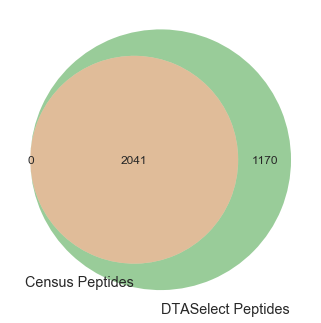

In [10]:
c = set(c_peps['aa_sequence'].str.cat(c_peps['cs'].astype(str), sep='_'))
d = set(d_peps['aa_sequence'].str.cat(d_peps['charge_state'].astype(str), sep='_'))

venn2([c,d], ['Census Peptides', 'DTASelect Peptides']);

Also, The census peptides are a perfect subset of the DTASelect Peptides.  Also not surprising as Census uses the DTASelect output to determine what to quantify.

## Compare N14 and N15 individually filtered results to the combined filtered result

In [11]:
n14_dta = os.path.join(BASE_DIR, 'rawXtractor/dta-pfp-0.01/DTASelect-filter.txt')
n15_dta = os.path.join(BASE_DIR, 'rawXtractor/n15_search/dta-pfp-0.01/DTASelect-filter.txt')

ldta = dtaparser_to_pd_peps(list(dta_select_parser(n14_dta)))
hdta = dtaparser_to_pd_peps(list(dta_select_parser(n15_dta)), n15=True)

ldta = ldta.drop_duplicates(['charge_state', 'aa_sequence'])
hdta = hdta.drop_duplicates(['charge_state', 'aa_sequence'])

In [12]:
combined = pd.merge(ldta, hdta, on=['charge_state', 'aa_sequence'], how='outer', suffixes=('_l', '_h'))

In [13]:
print(len(combined), len(d_peps))

3310 3211


Pretty close to each other.  That's good.  However, these might not be perfect Supersets of each other, so lets take a look at how they compare.

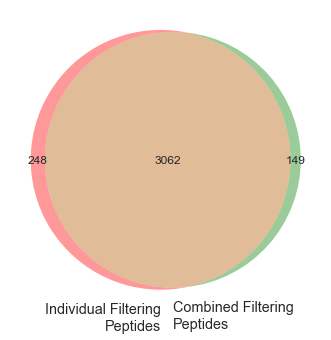

In [14]:
com = set(combined['aa_sequence'].str.cat(combined['charge_state'].astype(int).astype(str), sep='_'))
#d defined in cell 10

venn2([com,d], ['Individual Filtering\nPeptides', 'Combined Filtering\nPeptides']);

So these two are exteremly close to one another, basically within the magin of FDR.  That's great news, so there won't necessarily be a ton of need to go back and forth between individual and combined peptide filtering.

In [15]:
combined = combined.set_index(['aa_sequence', 'charge_state'])
d_peps = d_peps.set_index(['aa_sequence', 'charge_state'])

combined['indiv_counts'] = combined['redundancy_l'].replace(np.nan, 0) + combined['redundancy_h'].replace(np.nan, 0)
# Store source of file for later identification
combined['n15_dta'] = combined['n15_l'].replace(np.nan, False) | combined['n15_h'].replace(np.nan, False)

counts = pd.concat([combined[['indiv_counts', 'n15_dta']], d_peps[['redundancy', 'n15']]], axis=1).rename(columns={'redundancy':'comb_counts'})
counts.head(20)

,,indiv_counts,n15_dta,comb_counts,n15
aa_sequence,charge_state,,,,
AAAASLGEHILTLQK,2.0,2.0,True,2.0,False
AAADELGLPLYEYLGGPNAHVLPTPM(15.9949)MNVINGGK,3.0,3.0,False,3.0,False
AAADELGLPLYEYLGGPNAHVLPTPMM(15.9949)NVINGGK,3.0,1.0,False,1.0,False
AAADELGLPLYEYLGGPNAHVLPTPMMNVINGGK,3.0,31.0,False,31.0,False
AAAINIIPHSTGAAK,2.0,78.0,True,77.0,False
AAAQNTIPHSTGAAK,2.0,14.0,False,12.0,False
AADLDAIHDTVHEM(15.9949)AR,2.0,4.0,False,4.0,False
AADLDAIHDTVHEMAR,2.0,18.0,False,18.0,False
AADPM(15.9949)HCKPYADKFDCEFVPGEK,3.0,1.0,False,NaN,NaN


OK so these don't look all that off from each other.  A couple that appear in one search or the other, with very few Let's see what the greatest differencs are and try to see whats useable.

In [16]:
diff = (abs(counts['indiv_counts'].replace(np.nan, 0)-counts['comb_counts'].replace(np.nan, 0)))

In [17]:
diff.nlargest(20)

aa_sequence                           charge_state
RPFTAIMGGSK                           2.0             34.0
VIFHDRPSLENR                          2.0             29.0
VSYPINHIESIVEPISAGPAAK                3.0             29.0
CPEPCPPQVWPGPCR                       2.0             20.0
FITDHSITAR                            2.0             19.0
IQHNIMAMNAYR                          2.0             19.0
AKLTVTITRSQAAAQAMTK                   2.0             17.0
LTDQFCSILENKNMM(15.9949)IEGNK         3.0             16.0
DAASFAPLHNPAHLIGIEEALK                3.0             14.0
PGDEVLTGDDLYGGSNR                     2.0             14.0
AHVDCPGHADYVK                         2.0             13.0
QANEGLVNAHNVQTDMLTQEAQGNHVK           3.0             13.0
FIYGVLEKPFR                           2.0             12.0
FQHPVAGTYK                            2.0             12.0
IVRPVSAAPAAK                          2.0             12.0
LQEALLPVVDYEHCSR                      2.0             12.0
WLHGN

Ok, theres actually some fairly large differences in there...  Less than 10 counts is fine, but more than that is a bit worrysome.  However, it really depends.  If the diffence is large, with both having a lot of counts, that's not so bad, but if it's large with minimal counts, that's more prolematic. 

Lets look at them

In [18]:
idxs = diff.nlargest(20).index
counts.loc[idxs]

,,indiv_counts,n15_dta,comb_counts,n15
aa_sequence,charge_state,,,,
RPFTAIMGGSK,2.0,34.0,False,68.0,True
VIFHDRPSLENR,2.0,103.0,True,132.0,True
VSYPINHIESIVEPISAGPAAK,3.0,NaN,NaN,29.0,False
CPEPCPPQVWPGPCR,2.0,30.0,False,50.0,False
FITDHSITAR,2.0,125.0,True,144.0,False
IQHNIMAMNAYR,2.0,42.0,False,61.0,False
AKLTVTITRSQAAAQAMTK,2.0,2.0,True,19.0,True
LTDQFCSILENKNMM(15.9949)IEGNK,3.0,16.0,False,NaN,NaN
DAASFAPLHNPAHLIGIEEALK,3.0,14.0,False,NaN,NaN


It almost looks like the combined filtering has greater peptide counts than the individual searches.  The exception seem to be the case where there were no hits in the combined search at all.  

In [19]:
print('Total Peptides: ', len(counts))
print('Total Filtered Peptides: ',len(counts.dropna()))
print('Combined >= individual: ' ,(counts.dropna()['comb_counts'] >= counts.dropna()['indiv_counts']).sum())
print('Combined == individual: ' ,(counts.dropna()['comb_counts'] == counts.dropna()['indiv_counts']).sum())
print('Combined < individual: ', (counts.dropna()['comb_counts'] < counts.dropna()['indiv_counts']).sum())

Total Peptides:  3459
Total Filtered Peptides:  3062
Combined >= individual:  2712
Combined == individual:  2392
Combined < individual:  350


Alright, so it's all very close.  Let's merge in some information from census and see if it helps shed any light on this info

In [20]:
census_cols = ['ratio', 'rev_slope_ratio', 'c_n15', 'type']
c_peps = c_peps.rename(columns={'cs':'charge_state', 'n15': 'c_n15'}).set_index(['aa_sequence', 'charge_state'])
df = pd.concat([counts,c_peps[census_cols]], axis=1)
df.head(20)

,,indiv_counts,n15_dta,comb_counts,n15,ratio,rev_slope_ratio,c_n15,type
aa_sequence,charge_state,,,,,,,,
AAAASLGEHILTLQK,2.0,2.0,True,2.0,False,0.350743,1.726343,False,S
AAADELGLPLYEYLGGPNAHVLPTPM(15.9949)MNVINGGK,3.0,3.0,False,3.0,False,3.301069,NaN,False,&S
AAADELGLPLYEYLGGPNAHVLPTPMM(15.9949)NVINGGK,3.0,1.0,False,1.0,False,3.301069,NaN,False,&S
AAADELGLPLYEYLGGPNAHVLPTPMMNVINGGK,3.0,31.0,False,31.0,False,8.257656,0.090267,False,S
AAAINIIPHSTGAAK,2.0,78.0,True,77.0,False,11.823705,0.078069,False,S
AAAQNTIPHSTGAAK,2.0,14.0,False,12.0,False,NaN,NaN,NaN,NaN
AADLDAIHDTVHEM(15.9949)AR,2.0,4.0,False,4.0,False,0.624497,1.486251,False,S
AADLDAIHDTVHEMAR,2.0,18.0,False,18.0,False,0.611922,1.430958,False,S
AADPM(15.9949)HCKPYADKFDCEFVPGEK,3.0,1.0,False,NaN,NaN,NaN,NaN,NaN,NaN


Interesting case where the individual DTA say it's n15, but the combined (and census) says it isn't.

Only 2 total spec counts, so perhaps its 1 in both.

In [21]:
ldta = ldta.set_index(['aa_sequence', 'charge_state'])
hdta = hdta.set_index(['aa_sequence', 'charge_state'])

ldta.loc['AAAASLGEHILTLQK', 2]

calcm+h+                               1522.86
conf%                                      100
deltcn                                0.343966
ionproportion                             40.5
m+h+                                   1522.86
ppm                                       -1.1
redundancy                                   1
sequence                   K.AAAASLGEHILTLQK.S
spr                                          1
spscore                                14.5836
totalintensity                              88
unique                                       *
xcorr                                   4.4905
diff_mass                                  NaN
is_modified                              False
lc_step                                      3
mods                                       NaN
scan                                      8353
unmod_peptide                  AAAASLGEHILTLQK
file_name         UnerFecal-Pool-1118-1122a-s3
n15                                      False
Name: (AAAASL

In [22]:
hdta.loc['AAAASLGEHILTLQK', 2]

calcm+h+                                1541.8
conf%                                     98.6
deltcn                                0.137357
ionproportion                             33.3
m+h+                                    1541.8
ppm                                       -0.5
redundancy                                   1
sequence                   K.AAAASLGEHILTLQK.S
spr                                          1
spscore                                9.53545
totalintensity                              88
unique                                       *
xcorr                                  3.99862
diff_mass                                  NaN
is_modified                              False
lc_step                                      3
mods                                       NaN
scan                                      8340
unmod_peptide                  AAAASLGEHILTLQK
file_name         UnerFecal-Pool-1118-1122a-s3
n15                                       True
Name: (AAAASL

In [23]:
df.query('type == "&S"').head(10)

,,indiv_counts,n15_dta,comb_counts,n15,ratio,rev_slope_ratio,c_n15,type
aa_sequence,charge_state,,,,,,,,
AAADELGLPLYEYLGGPNAHVLPTPM(15.9949)MNVINGGK,3.0,3.0,False,3.0,False,3.301069,NaN,False,&S
AAADELGLPLYEYLGGPNAHVLPTPMM(15.9949)NVINGGK,3.0,1.0,False,1.0,False,3.301069,NaN,False,&S
AAHAVVGVHTSK,2.0,16.0,True,16.0,False,2.516922,NaN,False,&S
AAVFNHFISDGVKK,2.0,1.0,False,1.0,False,1.067582,NaN,False,&S
AAWEEAEHAAK,2.0,5.0,True,4.0,False,0.950578,NaN,False,&S
AEVPSGASTGENEAVELR,2.0,2.0,False,2.0,False,6.696832,NaN,False,&S
AFEEESTLNHIPR,2.0,2.0,False,2.0,False,0.000000,NaN,False,&S
AFGHFQAMLVDIDK,2.0,1.0,False,1.0,False,3.359179,NaN,False,&S
AFVEKPDVDKAPSDYAIIGR,3.0,3.0,False,3.0,False,0.000000,NaN,False,&S


**CASE** In row 3, indivudal fitering is showing this as an N15 peptide, yet census says its an n14 singleton:

In [24]:
ldta.loc['AAHAVVGVHTSK', 2]

calcm+h+                               1176.65
conf%                                      100
deltcn                                 0.43103
ionproportion                             42.4
m+h+                                   1178.65
ppm                                       -4.2
redundancy                                  14
sequence                      R.AAHAVVGVHTSK.K
spr                                          1
spscore                                17.5584
totalintensity                              88
unique                                        
xcorr                                  3.73164
diff_mass                                  NaN
is_modified                              False
lc_step                                      8
mods                                       NaN
scan                                      3542
unmod_peptide                     AAHAVVGVHTSK
file_name         UnerFecal-Pool-1118-1122a-s8
n15                                      False
Name: (AAHAVV

In [25]:
hdta.loc['AAHAVVGVHTSK', 2]

calcm+h+                                1193.6
conf%                                     99.5
deltcn                                0.341539
ionproportion                             33.3
m+h+                                    1193.6
ppm                                       -0.7
redundancy                                   2
sequence                      R.AAHAVVGVHTSK.K
spr                                          1
spscore                                15.1372
totalintensity                              88
unique                                        
xcorr                                  3.17217
diff_mass                                  NaN
is_modified                              False
lc_step                                      8
mods                                       NaN
scan                                      3564
unmod_peptide                     AAHAVVGVHTSK
file_name         UnerFecal-Pool-1118-1122a-s8
n15                                       True
Name: (AAHAVV

It's in both... Scans are close and LC steps are close enough that this should be quantified.  3564-3542 = 22 Scans apart.  The scan window is set to 50.  Strange.  This would be one to go back and look at the raw data for, once that code is written.

Let's see how many singletons the n14 and n15 singleton status is in disagreement

In [26]:
singletons = df.query('type == "&S"')

print(len(singletons))
print((~(singletons['n15_dta'] == singletons['n15'])).sum())

407
16


16 of 407 isn't bad.  So I can mostly turst this data.

In [27]:
filt = df.dropna(subset=['n15_dta', 'c_n15'])

print(len(filt))
print((~(filt['n15_dta'] == filt['c_n15'])).sum())

1966
407


A lot more mismatched types in the whole thing, but 1966-407 of these will have a ratio which we can use to quantify both peptides.

So here's what I'm thinking... Store 3 values for each peptide:
Ratio (or rev ratio), Total Spec counts from combined search (for weighting purposes), and spec counts for individual search (for quant of peptides that don't have a ratio).

So design a df with:

 - ratio
 - rev ratio
 - peptide type
 - combined spec counts
 - n14 search spec counts
 - n15 search spec counts
 - total of these 2?
 - n15 in combined DTA filename
 - (potential normalzingn factors, Xcorr, spcore)
 
 
Then when building loci:
 
 - N14 peps have 1 of the following
     - Have a ratio and not (&S type and n15)
         - pass ratio, total specs, individual specs
     - Have spec counts in n14 individual search
         - pass individual specs, (total specs?)
 - N15 peps have 1 of the following
     - Have a ratio and not both(&S type and not n15)
         - pass ratio, total specs, individual specs
     - Have spec counts in n15 individual search
         - pass individual specs
         
What if it has a ratio and it is a singleton?  Do we use the ratio?

## Find out how Census determines the overall ratio for a peptide

In [28]:
# Need fresh c_peps
c_prot, c_peps = cp.parse_file(census, norm=False)

In [29]:
#potential_norms = ['regression_factor', 'determinant_factor', 'probability_score', 'xcorr', 'sam_int', 'ref_int', 'peak_int', 'profile_score']
potential_norms = ['regression_factor', 'sam_int', 'ref_int', 'peak_int']
needed = ['ratio', 'rev_slope_ratio', 'type']

In [30]:
c_peps = c_peps.rename(columns={'cs':'charge_state'})
c_prot = c_prot.set_index(['index', 'locus']).sort_index()
c_peps = c_peps.set_index(['index', 'aa_sequence', 'charge_state']).sort_index()
sub_cpep = c_peps[potential_norms+needed]

In [31]:
from functools import reduce

dta_cols = ['redundancy']
n14 = ldta[dta_cols].rename(columns={'redundancy': 'l_spec'})
n14['n14'] = True
n15 = hdta[dta_cols].rename(columns={'redundancy': 'h_spec'})
n15['n15'] = True
comb = d_peps[dta_cols+['n15']].rename(columns={'redundancy': 'b_spec', 'n15':'b_n15'})

dfs = [n14.reset_index(), n15.reset_index(), comb.reset_index()]

final = reduce(lambda left,right: pd.merge(left, right, on=['aa_sequence', 'charge_state'], how='outer'),dfs)
final[['l_spec', 'h_spec', 'b_spec']] = final[['l_spec', 'h_spec', 'b_spec']].replace(np.nan, 0)
final['add_spec'] = final['l_spec'] + final['h_spec']

final[['n14', 'n15']] = final[['n14', 'n15']].replace(np.nan, False)

In [32]:
final = (pd.merge(sub_cpep.reset_index(), final, on=['aa_sequence','charge_state'], how='outer')
           .set_index(['index', 'aa_sequence', 'charge_state'])
           .sort_index())
final.tail(20)

regression_factor  \
index    aa_sequence                       charge_state                      
fe786530 THNQGVFDAYNDEIKR                  2.0                     0.89854   
         VVSTITSHKPGYLDK                   2.0                     0.92190   
         VVSTITSHKPGYLDKDLEK               3.0                     0.91941   
fef95bcb KGQLILSHR                         2.0                     0.97017   
ff289eec DGSFHHTCGGSLITPDWVLTAGHCISTSR     3.0                     0.96056   
         GVEEGQEQVIPINAGDLFVHPK            3.0                     0.95841   
         LQQALLPVVDYEHCSR                  2.0                     0.93850   
                                           3.0                     0.93417   
         LSTNGPLPDKLQQALLPVVDYEHCSR        3.0                     0.93062   
         SAQLGDAVQLACLPPAGEILPNGAPCYISGWGR 3.0                     0.95476   
         TYQVVLGEHER                       2.0                     0.96819   
         VVNGEEAVPHSWPWQVSLQYEK            3.0                     0.97902   
ff51a4f7 HLFTVLVK                          2.0                     0.77188   
ff5938b3 MPMVHDMEAILR                      2.0                     0.88518   
ffbbb144 LMVNHPETQVAHLADSFAAGR             3.0                     0.91302   
         YYKDEPFVHVFPASKPVQTK              3.0                     0.93865   
ffe08b73 WFLLEQPEIQVAHFPFK                 2.0                     0.77502   
                                           3.0                     0.90141   
fff80ac3 FLHTLENMGPSPEPNLTVLYSSR           3.0                     0.93049   
         THNQGVFDVYTPEIR                   2.0                     0.96646   

                                                         determinant_factor  \
index    aa_sequence                       charge_state                       
fe786530 THNQGVFDAYNDEIKR                  2.0                      0.80737   
         VVSTITSHKPGYLDK                   2.0                      0.84990   
         VVSTITSHKPGYLDKDLEK               3.0                      0.84531   
fef95bcb KGQLILSHR                         2.0                      0.94122   
ff289eec DGSFHHTCGGSLITPDWVLTAGHCISTSR     3.0                      0.92268   
         GVEEGQEQVIPINAGDLFVHPK            3.0                      0.91855   
         LQQALLPVVDYEHCSR                  2.0                      0.88079   
                                           3.0                      0.87267   
         LSTNGPLPDKLQQALLPVVDYEHCSR        3.0                      0.86605   
         SAQLGDAVQLACLPPAGEILPNGAPCYISGWGR 3.0                      0.91157   
         TYQVVLGEHER                       2.0                      0.93739   
         VVNGEEAVPHSWPWQVSLQYEK            3.0                      0.95848   
ff51a4f7 HLFTVLVK                          2.0                      0.59581   
ff5938b3 MPMVHDMEAILR                      2.0                      0.78355   
ffbbb144 LMVNHPETQVAHLADSFAAGR             3.0                      0.83360   
         YYKDEPFVHVFPASKPVQTK              3.0                      0.88107   
ffe08b73 WFLLEQPEIQVAHFPFK                 2.0                      0.60065   
                                           3.0                      0.81254   
fff80ac3 FLHTLENMGPSPEPNLTVLYSSR           3.0                      0.86581   
         THNQGVFDVYTPEIR                   2.0                      0.93404   

                                                             sam_int  \
index    aa_sequence                       charge_state                
fe786530 THNQGVFDAYNDEIKR                  2.0             8514378.0   
         VVSTITSHKPGYLDK                   2.0             6785039.0   
         VVSTITSHKPGYLDKDLEK               3.0            18325183.0   
fef95bcb KGQLILSHR                         2.0              452676.0   
ff289eec DGSFHHTCGGSLITPDWVLTAGHCISTSR     3.0           750842086.0   
         GVEEGQEQVIPINAGDLFVHPK            3.0           194461430.0   
         LQQALLPVVDYEHCSR

In [106]:
import random

bool_col = (final.reset_index()
                 .set_index(['aa_sequence', 'charge_state'])['index']
                 .value_counts())
sort_idx = bool_col[bool_col > 2].index.tolist()

top = sort_idx[:20]
bot = sort_idx[-20:]
mid = sort_idx[200:220]
random = random.sample(sort_idx, 20)

### Look at simple average of S type peptide ratios and comapre to 'average ratio'

In [77]:
for ix in top:
    print(c_prot.loc[ix]['average_ratio'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['ratio'].mean())

2.00661 :	2.03344857143
2.33964 :	2.377758
1.68073 :	1.89786416667
0.16592 :	0.171563809524
1.18001 :	1.290604
0.93803 :	0.9862325
0.17483 :	0.182907368421
0.19219 :	0.195717333333
22.23736 :	22.5082375
0.18035 :	0.188968125
3.9373 :	3.95311545455
2.58359 :	3.362425
0.37101 :	0.377033076923
0.40323 :	0.407549230769
17.9785 :	19.1340328571
11.71836 :	11.8588966667
11.71836 :	11.8588966667
9.83974 :	15.0258066667
25.49727 :	53.625875
0.53615 :	0.550454545455


In [105]:
for ix in mid:
    print(c_prot.loc[ix]['average_ratio'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['ratio'].mean())

5.5641 :	10.895
3.23617 :	3.2487275
3.47437 :	3.486535
1.02171 :	1.2734375
1.32997 :	1.4759275
1.7538 :	1.965535
1.81073 :	1.8302125
2.09392 :	2.1069075
4.02689 :	4.1821275
nan :	nan
1.93791 :	1.9434675
nan :	nan
3.39002 :	3.515755
1.89254 :	1.948435
nan :	nan
0.02898 :	0.0370375
3.22475 :	3.368765
3.96509 :	7.5018475
0.93361 :	1.0090675
1.0656 :	1.1046475


In [78]:
for ix in bot:
    print(c_prot.loc[ix]['average_ratio'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['ratio'].mean())

3.36784 :	3.40029666667
1.74037 :	1.79367666667
nan :	nan
nan :	nan
1.64087 :	1.99708666667
2.14454 :	2.15875
0.98657 :	1.07539
1.1688 :	1.16949666667
0.80546 :	0.812783333333
2.22618 :	2.25632
1.49648 :	1.55151666667
1.44298 :	1.46786333333
0.48918 :	0.560326666667
1.60842 :	1.69768
0.8898 :	0.909146666667
nan :	nan
nan :	nan
0.24805 :	0.249726666667
0.20758 :	0.2099
nan :	nan


In [107]:
for ix in random:
    print(c_prot.loc[ix]['average_ratio'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['ratio'].mean())

1.12547 :	1.63438333333
nan :	nan
0.53615 :	0.550454545455
0.18035 :	0.188968125
1.08894 :	1.13583666667
1.08509 :	1.25771333333
0.80247 :	1.12900333333
2.52488 :	2.71513666667
1.14421 :	1.30277428571
0.36669 :	0.369283333333
2.58359 :	3.362425
nan :	nan
24.64294 :	24.64294
0.22003 :	0.23317
1.86413 :	4.87027
1.30066 :	1.30066
nan :	nan
1.03083 :	1.031365
2.12149 :	2.13389
2.00144 :	2.10448222222


### Look at a spec count weighted ratio vs 'average_ratio' and 'composite_ratio'

In [81]:
final['spec_ratio'] = final['ratio'] * final['b_spec']

In [89]:
for ix in top:
    print(c_prot.loc[ix]['composite_ratio'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['spec_ratio'].sum() / final.loc[ix].query("type == 'S'")['b_spec'].sum())

2.27838 :	2.02964645472
2.74731 :	2.41477448905
2.95051 :	2.33859976562
0.17351 :	0.154872827115
1.42224 :	1.43738891775
0.89013 :	0.947311690141
0.17674 :	0.174728460628
0.18591 :	0.167313663366
23.68842 :	22.7926746429
0.17681 :	0.174912130031
4.65105 :	3.88710027816
19.36469 :	5.31875681818
0.37432 :	0.362213360489
0.43086 :	0.383622682927
20.5547 :	20.3702252695
17.51626 :	11.9317809375
15.10944 :	11.9317809375
21.24236 :	21.4380227119
45.67104 :	98.3194155263
0.59124 :	0.544044729064


In [111]:
for i, ix in enumerate(mid):
    try: 
        print(i, c_prot.loc[ix]['composite_ratio'].max(), end=' :\t')
        print(final.loc[ix].query("type == 'S'")['spec_ratio'].sum() / final.loc[ix].query("type == 'S'")['b_spec'].sum())
    except:
        print('')

0 5.98763 :	18.4856656618
1 3.89981 :	3.16825083333
2 4.73375 :	3.39567830508
3 1.63973 :	1.20812785714
4 1.01962 :	1.69025384615
5 2.05141 :	2.3070295
6 2.06992 :	1.77474222222
7 2.25298 :	2.05926333333
8 5.23885 :	3.42960703704
9 0.00688 :	
10 2.10242 :	2.00106828571
11 11.73955 :	
12 4.27682 :	3.43493388889
13 2.34997 :	1.80377857143
14 14.58908 :	
15 0.02717 :	0.0318966269841
16 3.63196 :	3.86267333333
17 5.27204 :	18.432103913
18 0.81402 :	1.14008934783
19 1.2717 :	0.85451


There shouldn't be values where there's 0 spec counts, but there is a ratio.....

In [121]:
final.loc[mid[9]]

,,regression_factor,determinant_factor,sam_int,ref_int,peak_int,ratio,rev_slope_ratio,type,l_spec,n14,h_spec,n15,b_spec,b_n15,add_spec,spec_ratio,peak_ratio,reg_ratio
aa_sequence,charge_state,,,,,,,,,,,,,,,,,,
ELPTPMMNIINGGEHADNNIDFQEFMIMPVGAPTFK,3.0,-1.00000,0.00000,228536.0,12345191.0,2432012.0,0.00000,NaN,&S,0.0,False,2.0,True,2.0,True,2.0,0.00000,0.00000,-0.000000
KAGYTAVVSHR,2.0,0.53409,0.28525,27103.0,10612836.0,944095.0,0.00469,NaN,&S,0.0,False,5.0,True,6.0,True,5.0,0.02814,4427.80555,0.002505
MGAEVFHALK,2.0,0.14891,0.02218,11650.0,5621256.0,1092373.0,0.00126,NaN,&S,0.0,False,1.0,True,1.0,True,1.0,0.00126,1376.38998,0.000188
SVLHGMGLNTAVGDEGGFAPNLESNEAAIK,3.0,0.65032,0.42291,1848102.0,33961667.0,5646287.0,0.01931,NaN,&S,0.0,False,3.0,True,3.0,True,3.0,0.05793,109029.80197,0.012558


In [130]:
c_prot.loc[mid[9]].iloc[:1]

,type,average_ratio,average_ratio_rev,standard_deviation,standard_deviation_rev,composite_ratio,composite_ratio_standard_deviation,weighted_average,log_inv_average,log_inv_average_rev,peptide_num,total_peptide_num,spec_count,area_ratio,description
locus,,,,,,,,,,,,,,,
165738659||S-Fe11_GL0014808_1_1289_+,P,NaN,NaN,NaN,NaN,0.00688,4.85564,NaN,NaN,NaN,NaN,4,12,NaN,S-Fe11_GL0014808_1_1289_+


In [123]:
final.loc[mid[11]]

,,regression_factor,determinant_factor,sam_int,ref_int,peak_int,ratio,rev_slope_ratio,type,l_spec,n14,h_spec,n15,b_spec,b_n15,add_spec,spec_ratio,peak_ratio,reg_ratio
aa_sequence,charge_state,,,,,,,,,,,,,,,,,,
AGTPFAPGANPMHGR,2.0,-1.00000,0.0000,196623.0,0.0,60681.0,0.00000,NaN,&S,1.0,True,0.0,False,1.0,False,1.0,0.0000,0.0000,-0.000000
ALHPFGGINMIK,2.0,-1.00000,0.0000,2753392.0,565075.0,522444.0,0.00000,NaN,&S,1.0,True,0.0,False,1.0,False,1.0,0.0000,0.0000,-0.000000
HALLQIQEMAAK,2.0,-1.00000,0.0000,1096796.0,81062.0,263413.0,0.00000,NaN,&S,3.0,True,0.0,False,3.0,False,3.0,0.0000,0.0000,-0.000000
IVGLQTDAPLKR,2.0,0.00998,0.0001,724668.0,71145.0,201116.0,0.07465,NaN,&S,2.0,True,0.0,False,2.0,False,2.0,0.1493,15013.3094,0.000745


In [129]:
c_prot.loc[mid[11]].iloc[:1]

,type,average_ratio,average_ratio_rev,standard_deviation,standard_deviation_rev,composite_ratio,composite_ratio_standard_deviation,weighted_average,log_inv_average,log_inv_average_rev,peptide_num,total_peptide_num,spec_count,area_ratio,description
locus,,,,,,,,,,,,,,,
11075590||gi|378711429|ref|YP_005276322.1,P,NaN,NaN,NaN,NaN,11.73955,15.81784,NaN,NaN,NaN,NaN,4,7,NaN,formate acetyltransferase [Escherichia coli K...


In [122]:
final.loc[mid[14]]

,,regression_factor,determinant_factor,sam_int,ref_int,peak_int,ratio,rev_slope_ratio,type,l_spec,n14,h_spec,n15,b_spec,b_n15,add_spec,spec_ratio,peak_ratio,reg_ratio
aa_sequence,charge_state,,,,,,,,,,,,,,,,,,
M(15.9949)IDELHLPK,2.0,0.21548,0.04643,2179262.0,173904.0,413632.0,1.42365,NaN,&S,1.0,True,0.0,False,1.0,False,1.0,1.42365,588867.1968,0.306768
MIDELHLPK,2.0,-1.00000,0.00000,4687493.0,316520.0,720914.0,0.00000,NaN,&S,3.0,True,0.0,False,3.0,False,3.0,0.00000,0.0000,-0.000000
NIVFSPLSISAALAVMSLGAK,2.0,0.20467,0.04189,1788981.0,124477.0,272640.0,1.50656,NaN,&S,8.0,True,0.0,False,8.0,False,8.0,12.05248,410748.5184,0.308348
RPVIVPMMSMEDLTTPYFR,2.0,-1.00000,0.00000,1608079.0,80823.0,317401.0,0.00000,NaN,&S,1.0,True,0.0,False,1.0,False,1.0,0.00000,0.0000,-0.000000


In [133]:
for ix in bot:
    try: 
        print(c_prot.loc[ix]['composite_ratio'].max(), end=' :\t')
        print(final.loc[ix].query("type == 'S'")['spec_ratio'].sum() / final.loc[ix].query("type == 'S'")['b_spec'].sum())
    except:
        print('')

3.87495 :	3.674038
2.09484 :	1.99076913043
346.47924 :	
16.40978 :	
3.13418 :	2.14001636364
3.11748 :	1.90881315789
1.07928 :	1.14317391304
1.23891 :	1.20333625
0.86806 :	0.702190740741
3.11748 :	1.92421894737
2.18657 :	1.49112666667
1.8061 :	1.6549
0.38625 :	0.543418490566
1.4597 :	1.8360175
1.01999 :	0.712703461538
108.16401 :	
40.23309 :	
0.23839 :	0.244196
0.19996 :	0.230543333333
4.38069 :	


In [134]:
for ix in random:
    try: 
        print(c_prot.loc[ix]['composite_ratio'].max(), end=' :\t')
        print(final.loc[ix].query("type == 'S'")['spec_ratio'].sum() / final.loc[ix].query("type == 'S'")['b_spec'].sum())
    except:
        print('')

1.02571 :	2.40121
16.40978 :	
0.59124 :	0.544044729064
0.17681 :	0.174912130031
1.48494 :	1.09155875
1.74034 :	0.985182307692
0.58644 :	0.664024444444
3.28093 :	1.63697833333
1.71671 :	1.267402
0.39115 :	0.333438181818
19.36469 :	5.31875681818
11.2566 :	
39.63355 :	24.64294
0.3373 :	0.195561090909
1.78592 :	10.0350645455
9.91758 :	1.30066
2048.0 :	
1.14843 :	1.04205958333
2.46378 :	2.22127692308
2.63099 :	2.22938585366


## Using peak_integration weighted ratio and comparing to 'average ratio'

In [90]:
final['peak_ratio'] = final['ratio'] * final['peak_int']

In [93]:
for ix in top:
    print(c_prot.loc[ix]['average_ratio'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['peak_ratio'].sum() / final.loc[ix].query("type == 'S'")['peak_int'].sum())

2.00661 :	2.10379462776
2.33964 :	2.32069373209
1.68073 :	1.75699917784
0.16592 :	0.165576647177
1.18001 :	1.34003590108
0.93803 :	0.927116942564
0.17483 :	0.167717053126
0.19219 :	0.182772269946
22.23736 :	19.6559915372
0.18035 :	0.168130567589
3.9373 :	3.72811635403
2.58359 :	4.66695642597
0.37101 :	0.369320083306
0.40323 :	0.386455231418
17.9785 :	20.5863067379
11.71836 :	11.4944901238
11.71836 :	11.4944901238
9.83974 :	17.7808094052
25.49727 :	96.0123220427
0.53615 :	0.557866011114


In [135]:
for ix in top:
    print(c_prot.loc[ix]['composite_ratio'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['peak_ratio'].sum() / final.loc[ix].query("type == 'S'")['peak_int'].sum())

2.27838 :	2.10379462776
2.74731 :	2.32069373209
2.95051 :	1.75699917784
0.17351 :	0.165576647177
1.42224 :	1.34003590108
0.89013 :	0.927116942564
0.17674 :	0.167717053126
0.18591 :	0.182772269946
23.68842 :	19.6559915372
0.17681 :	0.168130567589
4.65105 :	3.72811635403
19.36469 :	4.66695642597
0.37432 :	0.369320083306
0.43086 :	0.386455231418
20.5547 :	20.5863067379
17.51626 :	11.4944901238
15.10944 :	11.4944901238
21.24236 :	17.7808094052
45.67104 :	96.0123220427
0.59124 :	0.557866011114


In [137]:
for ix in top:
    print(c_prot.loc[ix]['weighted_average'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['peak_ratio'].sum() / final.loc[ix].query("type == 'S'")['peak_int'].sum())

2.05078 :	2.10379462776
2.39565 :	2.32069373209
1.92139 :	1.75699917784
0.17008 :	0.165576647177
1.31478 :	1.34003590108
0.97654 :	0.927116942564
0.17998 :	0.167717053126
0.19545 :	0.182772269946
23.33494 :	19.6559915372
0.1847 :	0.168130567589
3.92729 :	3.72811635403
3.49609 :	4.66695642597
0.37806 :	0.369320083306
0.41137 :	0.386455231418
19.99892 :	20.5863067379
11.64872 :	11.4944901238
11.64872 :	11.4944901238
17.48135 :	17.7808094052
67.77561 :	96.0123220427
0.55593 :	0.557866011114


### Using Regression Factor weighted ratio and comparing to 'weighted average'

In [94]:
final['reg_ratio'] = final['ratio'] * final['regression_factor']

In [97]:
for ix in top:
    print(c_prot.loc[ix]['weighted_average'].max(), end=' :\t')
    print(final.loc[ix].query("type == 'S'")['reg_ratio'].sum() / final.loc[ix].query("type == 'S'")['regression_factor'].sum())

2.05078 :	2.03892381354
2.39565 :	2.38343839067
1.92139 :	1.90599103531
0.17008 :	0.171054066997
1.31478 :	1.2987559415
0.97654 :	0.983379140826
0.17998 :	0.181946372985
0.19545 :	0.195604300563
23.33494 :	22.7542763256
0.1847 :	0.187575770772
3.92729 :	3.94460150329
3.49609 :	3.40225495281
0.37806 :	0.377368228323
0.41137 :	0.408737809135
19.99892 :	19.443440243
11.64872 :	11.7921020906
11.64872 :	11.7921020906
17.48135 :	15.877859055
67.77561 :	57.9583519903
0.55593 :	0.552160344161


In [138]:
for ix in mid:
    try:
        print(c_prot.loc[ix]['weighted_average'].max(), end=' :\t')
        print(final.loc[ix].query("type == 'S'")['reg_ratio'].sum() / final.loc[ix].query("type == 'S'")['regression_factor'].sum())
    except:
        print('')

9.38703 :	10.4198332897
3.28388 :	3.25859129399
3.47589 :	3.48268161474
1.24633 :	1.26550000053
1.36345 :	1.44028636648
2.12356 :	2.01801761677
1.82597 :	1.82901385466
2.12062 :	2.11117596549
4.02365 :	4.132780546
nan :	
1.9454 :	1.94404006813
nan :	
3.61253 :	3.54412333142
1.98556 :	1.96229391834
nan :	
0.04074 :	0.0381699299317
3.30371 :	3.35004262283
7.03086 :	7.35952135153
1.02104 :	1.01264227494
1.08554 :	1.09906893824


In [102]:
for ix in bot:
    try:
        print(c_prot.loc[ix]['weighted_average'].max(), end=' :\t')
        print(final.loc[ix].query("type == 'S'")['reg_ratio'].sum() / final.loc[ix].query("type == 'S'")['regression_factor'].sum())
    except:
        print('')

3.44507 :	3.41393041685
1.88383 :	1.82264417495
nan :	
nan :	
2.20107 :	2.06373170942
2.14066 :	2.15435513583
1.09921 :	1.08262497543
1.17311 :	1.17060637497
0.79674 :	0.808060800612
2.23727 :	2.25364831738
1.57681 :	1.55818258527
1.5158 :	1.48317517522
0.56009 :	0.560305233175
1.70139 :	1.69879630618
0.87693 :	0.899333196338
nan :	
nan :	
0.25188 :	0.250358336559
0.21157 :	0.210392859874
nan :	


In [139]:
for ix in random:
    try:
        print(c_prot.loc[ix]['weighted_average'].max(), end=' :\t')
        print(final.loc[ix].query("type == 'S'")['reg_ratio'].sum() / final.loc[ix].query("type == 'S'")['regression_factor'].sum())
    except:
        print('')

1.34068 :	1.54278649094
nan :	
0.55593 :	0.552160344161
0.1847 :	0.187575770772
1.19359 :	1.15424348027
1.19214 :	1.2384284385
1.16216 :	1.13963450815
2.67853 :	2.70461430243
1.2533 :	1.28803717374
0.3683 :	0.368901873304
3.49609 :	3.40225495281
nan :	
24.64294 :	24.64294
0.2217 :	0.229609141036
4.78977 :	4.87118148382
1.30066 :	1.30066
nan :	
1.0265 :	1.02989505128
2.14306 :	2.13664454038
2.12034 :	2.10998955039
